# Exploratory Data Analysis (EDA)

In this EDA we will analyse different features of the data. Since we are working with images, we will take a look at the amount of pixels, the color distribution and the bluriness of the pictures to get an overview over the data. We are also provided with a cvs file that contains the filenames and labels. 

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, fbeta_score

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os, cv2
from PIL import Image
import opendatasets as od
import zipfile

# Ignore warnings
import warnings
warnings.simplefilter("ignore")

/Users/clemensbretscher/neuefische/capstone/capstone2/cassava-classification-capstone/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
# Download Dataset from WWW.kaggle.com

#od.download("https://www.kaggle.com/c/cassava-leaf-disease-classification/data?select=train.csv")

In [4]:
# Unzip zipped files and extract them to a directory

# with zipfile.ZipFile("/Users/paulosgidyelew/Downloads/cassava-disease/train.zip", 'r') as zip_file:
#     zip_file.extractall("data")

## Label distribution

We will take a look at the csv file that contains the filenames (image_id) and the label.

In [6]:
# Read csv file from directory and display head of dataset

df = pd.read_csv('../data/train.csv')
df.head()

image_id  label
0  1000015157.jpg      0
1  1000201771.jpg      3
2   100042118.jpg      1
3  1000723321.jpg      1
4  1000812911.jpg      3

In [6]:
# Overview of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21397 entries, 0 to 21396
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  21397 non-null  object
 1   label     21397 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 334.5+ KB


Our dataset contains 21,397 observations

We want to check out, how many labels the dataset contains:

In [7]:
# Display category labels
df.label.unique()

array([0, 3, 1, 2, 4])

There are 5 different labels (0-4). 
We know from the description of the project that the labels have the following meaning:<br>
0: Cassava Bacterial Blight (CBB)<br>
1: Cassava Brown Streak Disease (CBSD)<br>
2: Cassava Green Mottle (CGM)<br>
3: Cassava Mosaic Disease (CMD)<br>
4: Healthy<br>

We want to investigate how often the different labels appear:

In [8]:
# Organize data distribution in data frame

def data_dist(num):
    cbb,cbsd,cgm,cmd,healthy= [],[],[],[],[]
    count = 0
    for i in range(num):
        if i == 0:
            cbb.append(df.label[df.label==i].count())
        elif i == 1:
            cbsd.append(df.label[df.label==i].count())
        elif i == 2:
            cgm.append(df.label[df.label==i].count())
        elif i == 3:
            cmd.append(df.label[df.label==i].count())
        elif i == 4:
            healthy.append(df.label[df.label==i].count())
        else:
            total.append(df.label[df.label==i].count())
        count += df.label[df.label==i].count()
    #count = len(df.label)
    count = pd.DataFrame({'cbb':cbb,'cbsd':cbsd,'cgm':cgm,'cmd':cmd,'healthy':healthy,'total':count},index=['Count'])
    return count
    
# instantiation of function call

data_dist(len(df.label.unique()))


cbb  cbsd   cgm    cmd  healthy  total
Count  1087  2189  2386  13158     2577  21397

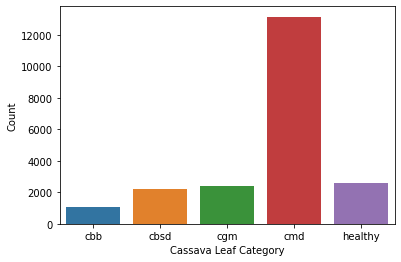

In [9]:
# Plot data distribution

sns.countplot(data = df, x=df.label)
plt.xlabel('Cassava Leaf Category')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4],['cbb','cbsd','cgm','cmd','healthy'])
plt.show()

The numbers and the plot above clearly show that our data distribution is imbalanced. the label cmd appears by far the most. 

## Image properties

Let us have a look at how example images of the different disease may look like:

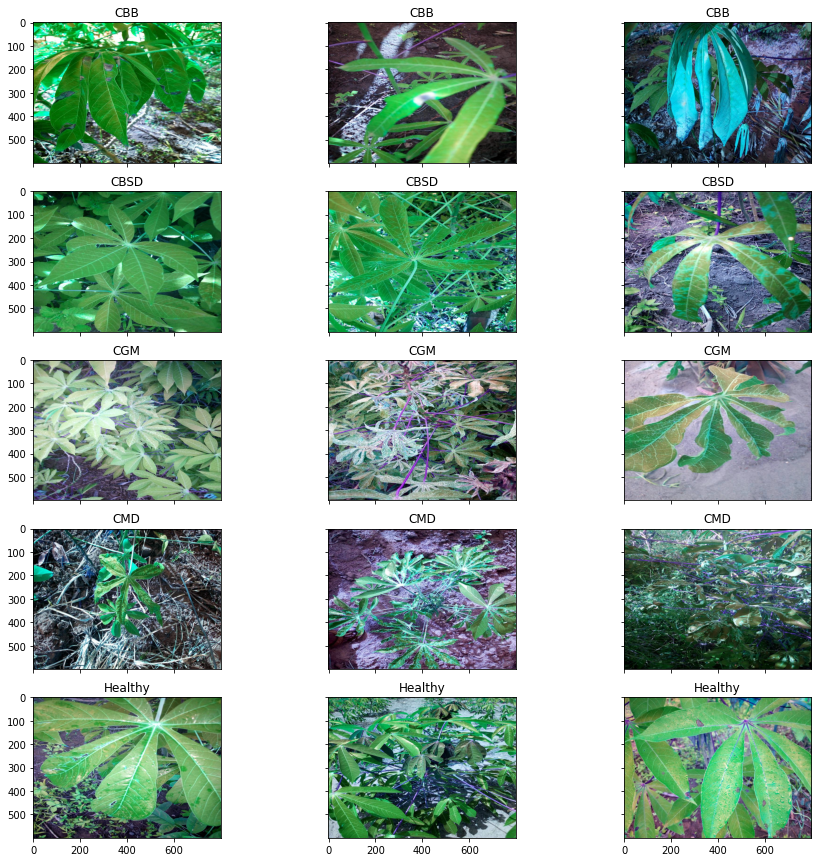

In [82]:
#label 0: cbb
figure, axis =plt.subplots(5,3, figsize=(15,15),sharex=True, sharey=True)
#axis = axis.ravel()
axis[0,0].imshow(cv2.imread("../data/train_images/1012426959.jpg"))
axis[0,0].set_title('CBB')
axis[0,1].imshow(cv2.imread("../data/train_images/1001320321.jpg"))
axis[0,1].set_title('CBB')
axis[0,2].imshow(cv2.imread("../data/train_images/1003888281.jpg"))
axis[0,2].set_title('CBB')

axis[1,0].imshow(cv2.imread("../data/train_images/100042118.jpg"))
axis[1,0].set_title('CBSD')
axis[1,1].imshow(cv2.imread("../data/train_images/1000723321.jpg"))
axis[1,1].set_title('CBSD')
axis[1,2].imshow(cv2.imread("../data/train_images/1002088496.jpg"))
axis[1,2].set_title('CBSD')

axis[2,0].imshow(cv2.imread("../data/train_images/1000910826.jpg"))
axis[2,0].set_title('CGM')
axis[2,1].imshow(cv2.imread("../data/train_images/100472565.jpg"))
axis[2,1].set_title('CGM')
axis[2,2].imshow(cv2.imread("../data/train_images/1004826518.jpg"))
axis[2,2].set_title('CGM')

axis[3,0].imshow(cv2.imread("../data/train_images/1004672608.jpg"))
axis[3,0].set_title('CMD')
axis[3,1].imshow(cv2.imread("../data/train_images/1004881261.jpg"))
axis[3,1].set_title('CMD')
axis[3,2].imshow(cv2.imread("../data/train_images/1005138819.jpg"))
axis[3,2].set_title('CMD')

axis[4,0].imshow(cv2.imread("../data/train_images/1003442061.jpg"))
axis[4,0].set_title('Healthy')
axis[4,1].imshow(cv2.imread("../data/train_images/100560400.jpg"))
axis[4,1].set_title('Healthy')
axis[4,2].imshow(cv2.imread("../data/train_images/1009126931.jpg"))
axis[4,2].set_title('Healthy')




plt.show()

The size of the images are 800x600 pixels. Let us find out if all the images have the same size. Therefore, we will go through all the images and extract the height and the width of the images and store them into a dataframe. Since we will need also other features of the image later, we will store these here, too. 

In [3]:
#creating a dataframe that will hold the filename, width and height, mean colors and the blur (laplacian) of each image
df_images=pd.DataFrame(columns=['filename', 'width', 'height','mean_blue','mean_green','mean_red', 'laplacian' ])

#going through the images in a folder and adding each image to a list
path = "../data_2/train/cbb"

with os.scandir(path) as it:
    for idx, entry in enumerate(it):
        if entry.is_file():
            
            img = cv2.imread(entry.path)
                     
            width = img.shape[0]
            height = img.shape[1]
            blue = img.mean(axis=0).mean(axis=0)[0]
            green = img.mean(axis=0).mean(axis=0)[1]
            red = img.mean(axis=0).mean(axis=0)[2]
            
            img_gry = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
            laplacian_var = cv2.Laplacian(img_gry,cv2.CV_32F,ksize=1).var()

            new_row = pd.DataFrame([[entry.name, width, height, blue, green, red, laplacian_var]], columns=['filename', 'height', 'width','mean_blue', 'mean_green', 'mean_red', 'laplacian'])
            df_images = pd.concat((df_images, new_row), axis=0)

path = "../data_2/train/cbsd"

with os.scandir(path) as it:
    for idx, entry in enumerate(it):
        if entry.is_file():
            
            img = cv2.imread(entry.path)
                     
            width = img.shape[0]
            height = img.shape[1]
            blue = img.mean(axis=0).mean(axis=0)[0]
            green = img.mean(axis=0).mean(axis=0)[1]
            red = img.mean(axis=0).mean(axis=0)[2]
            
            img_gry = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
            laplacian_var = cv2.Laplacian(img_gry,cv2.CV_32F,ksize=1).var()

            new_row = pd.DataFrame([[entry.name, width, height, blue, green, red, laplacian_var]], columns=['filename', 'height', 'width','mean_blue', 'mean_green', 'mean_red', 'laplacian'])
            df_images = pd.concat((df_images, new_row), axis=0)

path = "../data_2/train/cgm"

with os.scandir(path) as it:
    for idx, entry in enumerate(it):
        if entry.is_file():
            
            img = cv2.imread(entry.path)
                     
            width = img.shape[0]
            height = img.shape[1]
            blue = img.mean(axis=0).mean(axis=0)[0]
            green = img.mean(axis=0).mean(axis=0)[1]
            red = img.mean(axis=0).mean(axis=0)[2]
            
            img_gry = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
            laplacian_var = cv2.Laplacian(img_gry,cv2.CV_32F,ksize=1).var()

            new_row = pd.DataFrame([[entry.name, width, height, blue, green, red, laplacian_var]], columns=['filename', 'height', 'width','mean_blue', 'mean_green', 'mean_red', 'laplacian'])
            df_images = pd.concat((df_images, new_row), axis=0)

path = "../data_2/train/cmd"

with os.scandir(path) as it:
    for idx, entry in enumerate(it):
        if entry.is_file():
            
            img = cv2.imread(entry.path)
                     
            width = img.shape[0]
            height = img.shape[1]
            blue = img.mean(axis=0).mean(axis=0)[0]
            green = img.mean(axis=0).mean(axis=0)[1]
            red = img.mean(axis=0).mean(axis=0)[2]
            
            img_gry = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
            laplacian_var = cv2.Laplacian(img_gry,cv2.CV_32F,ksize=1).var()

            new_row = pd.DataFrame([[entry.name, width, height, blue, green, red, laplacian_var]], columns=['filename', 'height', 'width','mean_blue', 'mean_green', 'mean_red', 'laplacian'])
            df_images = pd.concat((df_images, new_row), axis=0)


path = "../data_2/train/healthy"

with os.scandir(path) as it:
    for idx, entry in enumerate(it):
        if entry.is_file():
            
            img = cv2.imread(entry.path)
                     
            width = img.shape[0]
            height = img.shape[1]
            blue = img.mean(axis=0).mean(axis=0)[0]
            green = img.mean(axis=0).mean(axis=0)[1]
            red = img.mean(axis=0).mean(axis=0)[2]
            
            img_gry = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
            laplacian_var = cv2.Laplacian(img_gry,cv2.CV_32F,ksize=1).var()

            new_row = pd.DataFrame([[entry.name, width, height, blue, green, red, laplacian_var]], columns=['filename', 'height', 'width','mean_blue', 'mean_green', 'mean_red', 'laplacian'])
            df_images = pd.concat((df_images, new_row), axis=0)
        #if idx ==200:
        #    break



#### Image size

We want to check the distribution of image sizes:

<AxesSubplot:xlabel='height', ylabel='width'>

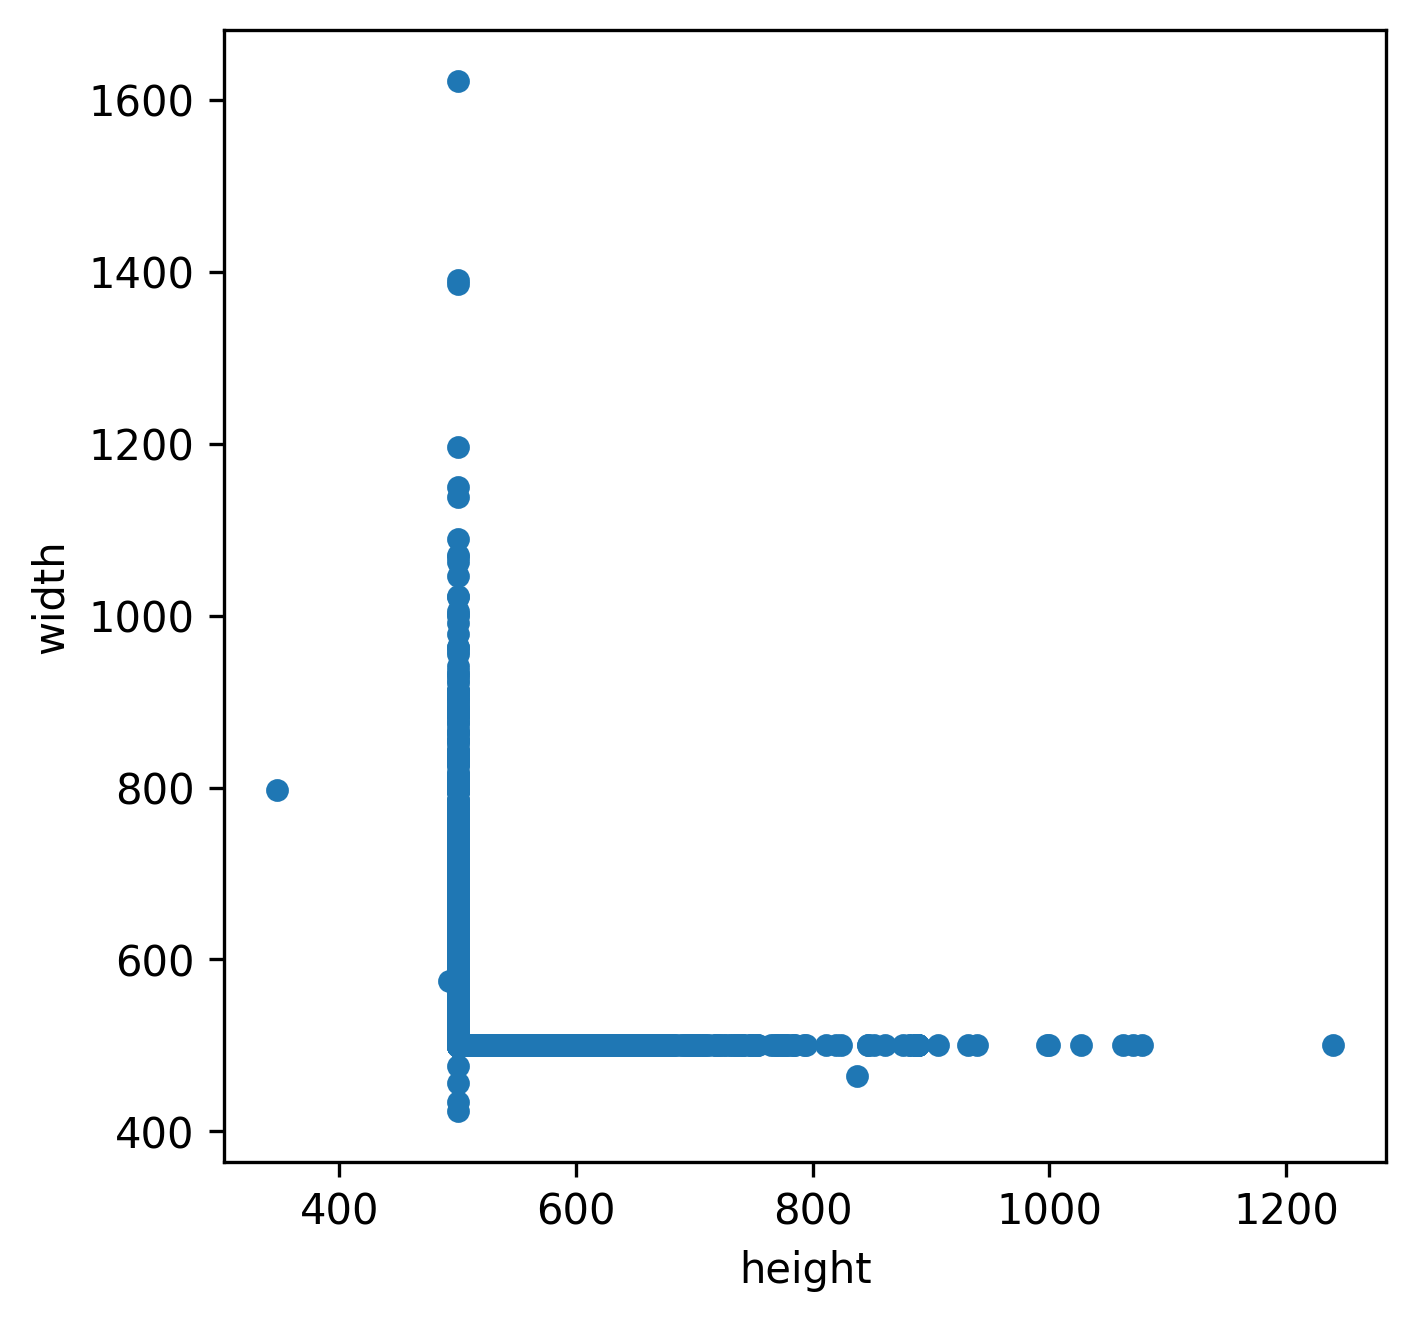

In [48]:
fig = plt.figure(dpi=300)
df_images.plot(kind='scatter', x='height', y='width', figsize=(5,5), ax = plt.gca())#, xlim=(450, 1100))

All images have the same heigth and width (600 x 800)

#### Image colors

I will check here the distribution of the colours:

<AxesSubplot:ylabel='Frequency'>

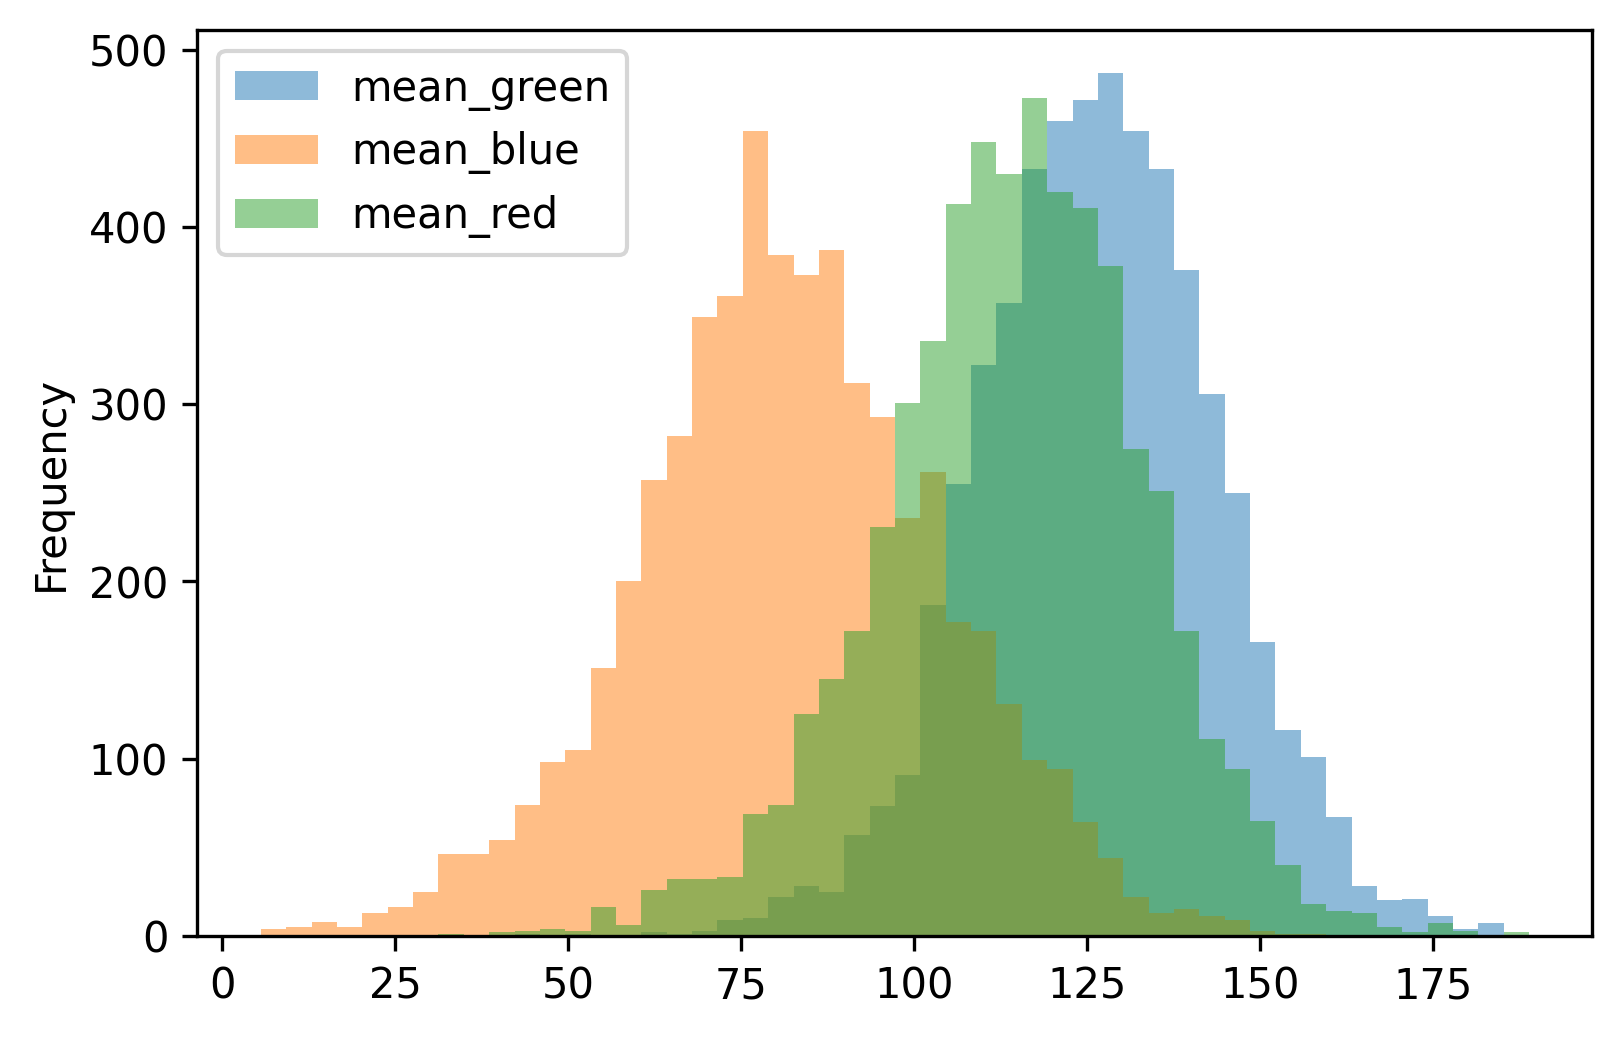

In [50]:
fig = plt.figure(dpi=300)

df_images[['mean_green','mean_blue','mean_red']].plot.hist(alpha=0.5, bins=50, ax = plt.gca())

Some pictures have a low green value and high blue or red values. We want to take a look at these pictures to see if they can be used for the models, or if they should be filtered out. 

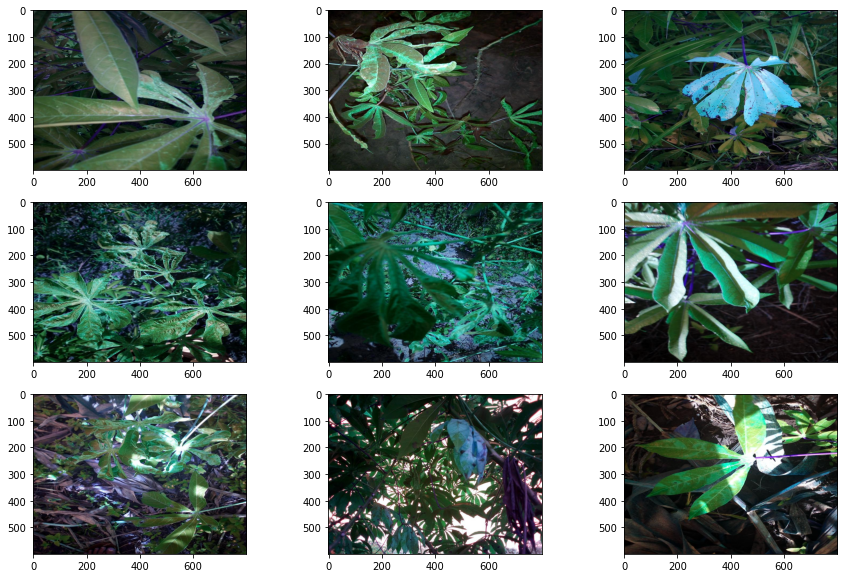

In [27]:
figure, axis =plt.subplots(3,3, figsize=(15,10))
axis = axis.ravel()

for i in range(9):
    non_green_img = df_images.query('mean_green < 80').iloc[i][0] #getting the filename
    path = "../data/train_images/" + non_green_img
    non_green_img = cv2.imread(path)
    axis[i].imshow(non_green_img)
    


In [52]:
df_images.query('mean_green < 60')

filename width height  mean_blue  mean_green   mean_red  \
0  train-cbsd-319.jpg   500    666  10.689255   45.630078  44.594916   
0   train-cgm-458.jpg   500    666  32.336595   51.461354  40.272126   

    laplacian  
0  157.790588  
0  184.763031

I want to look at images with high mean_red and with hight mean_blue values

Red:

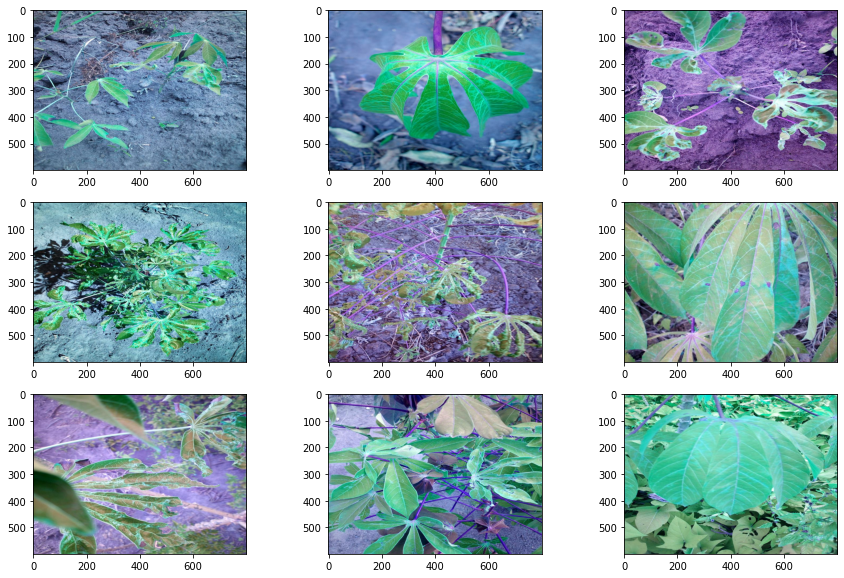

In [28]:
figure, axis =plt.subplots(3,3, figsize=(15,10))
axis = axis.ravel()

for i in range(9):
    non_green_img = df_images.query('mean_red > 150').iloc[i][0] #getting the filename
    path = "../data/train_images/" + non_green_img
    non_green_img = cv2.imread(path)
    axis[i].imshow(non_green_img)

Blue:

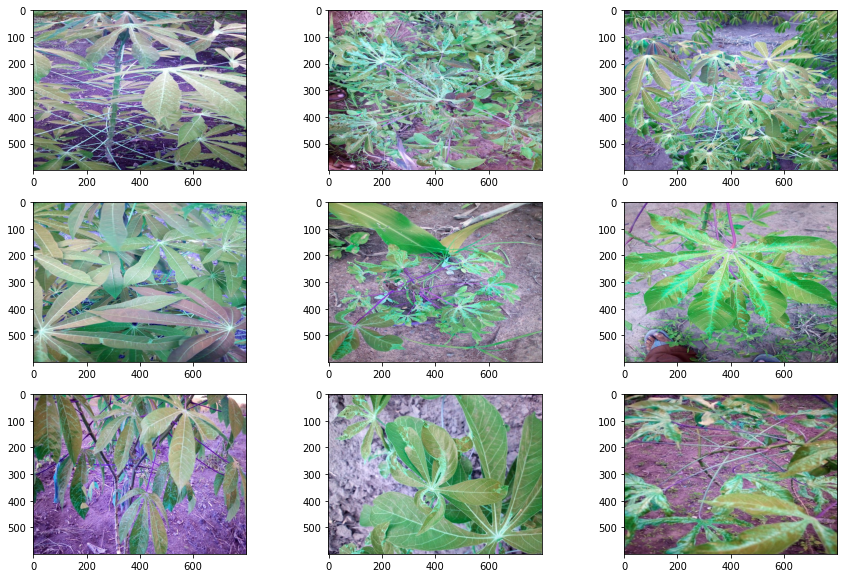

In [29]:
figure, axis =plt.subplots(3,3, figsize=(15,10))
axis = axis.ravel()

for i in range(9):
    non_green_img = df_images.query('mean_blue > 125').iloc[i][0] #getting the filename
    path = "../data/train_images/" + non_green_img
    non_green_img = cv2.imread(path)
    axis[i].imshow(non_green_img)

Since the images with a low mean_green, a high mean_red or a high mean_blue value do not seem to be bad in quality, we will not filter them out of the dataset, or do any other color transgormation with these pictures. One could consider that such an approach might improve the model later, but we will not do this at this time. 

#### Image blur (Laplacian Transformation):

Our dataset contains partly poor quality images. We need to find a solution to filter out these images from our dataset, since they will negatively impact the accuracy of our model. The laplace transform function is used to resolve this problem. In the following we will try to explain how this function would be applied and how it works.


##### Laplace Method


Laplace filtering method used to identify and highlight fine edges based on the 2nd derivative.

`OpenCV.Laplacian(gray_img, ksize, scale)` returns filtered image

Parameters:

gray_img - Grayscale image data
ksize - apertures size used to calculate 2nd derivative filter, specifies the size of the kernel (must be an odd integer: 1,3,5...)
scale - scaling factor applied (multiplied) to computed Laplacian values (scale = 1 is unscaled)

Context:

It is used to define edges around objects. The function calculates the Laplacian of the source image by adding up the second x and y derivatives calculated using the Sobel operator:

$Laplace(f) = \dfrac{\partial^{2} f}{\partial x^{2}} + \dfrac{\partial^{2} f}{\partial y^{2}}$

When ksize = 1, the Laplacian is computed by filtering the image with the following 3×3 aperture:

$\begin{bmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0 
\end{bmatrix}$


<p style="text-align: justify">Function described in this section is used to perform linear or non-linear filtering operations on 2D images. It means that for each pixel location (x, y) in the source image (normally, rectangular), its neighborhood is considered and used to compute the response. In case of a linear filter, it is a weighted sum of pixel values. In case of morphological operations, it is the minimum or maximum values, and so on. The computed response is stored in the destination image at the same location (x, y). It means that the output image will be of the same size as the input image. Normally, the functions support multi-channel arrays, in which case every channel is processed independently. Therefore, the output image will also have the same number of channels as the input one.</p>

Depth combinations:

|Input depth (src.depth())	|Output depth (ddepth)|
|---|---|
|CV_8U	|-1/CV_16S/CV_32F/CV_64F|
|CV_16U/CV_16S	|-1/CV_32F/CV_64F|
|CV_32F	|-1/CV_32F/CV_64F|
|CV_64F	|-1/CV_64F|

<p style="text-align: justify">OpenCV BGR images or Gray_scale have pixel values from 0 to 255 when in CV_8U - corresponds to np.uint8. When we use the Laplacian transform with ddepth (desired depth of the destination image), we set it to OpenCV.CV_32F or OpenCV.CV_64F.</p> 

For more details [click here](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#filter_depths)

##### Results

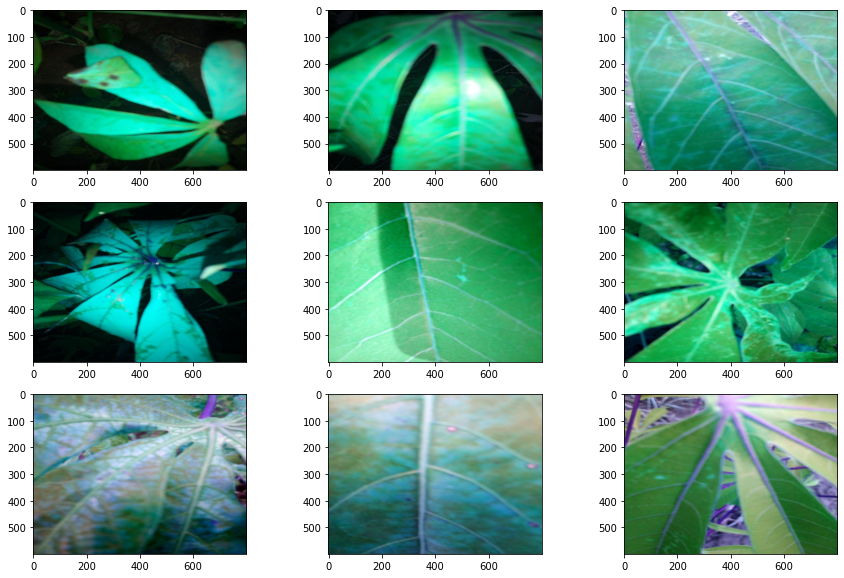

In [34]:
bad_qual_list = list(df_images.query('laplacian < 15').filename)

figure, axis =plt.subplots(3,3, figsize=(15,10))
axis = axis.ravel()

for i in range(9):
    bad_qual_img_name = bad_qual_list[i] #getting the filename
    path = "../data/train_images/" + bad_qual_img_name
    bad_qual_img = cv2.imread(path)
    axis[i].imshow(bad_qual_img)

This method allows us to get blurry pictures. We can later filter them out using this approach, if we want to test out model performance. 

##### commented out

In [9]:
# # Import library 
# import glob
# # Laplace transform function

# def laplacian(threshold, path):
#     bad_img,lap_val = [],[]
#     for img in glob.glob(path):
#         image = cv2.imread(img)
#         img_gry = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)
#         lap_var = cv2.Laplacian(img_gry,cv2.CV_32F,ksize=1).var()
#         if lap_var < threshold:
#             bad_img.append(img)
#             lap_val.append(lap_var)
#     bad_img_dict = {img:val for img,val in zip(bad_img,lap_val)}
#     return bad_img_dict


In [10]:
# # Instanciasion of function and variable assignment

# bad_img_dict = laplacian(30, "data/test/0/*.jpg")

In [11]:
# # Create a data frame for bad images

# bad_img_lap = [i.split('/')[3] for i in bad_img_dict.keys()]
# lap_val = bad_img_dict.values()
# bad_img_S = pd.Series(bad_img_lap)
# lap_var_S = pd.Series(lap_val)

# bad_img_frm = pd.concat([bad_img_S,lap_var_S],axis=1)
# bad_img_frm.columns = ['image_id','laplacian_var']
# bad_img_frm.head()

Empty DataFrame
Columns: [image_id, laplacian_var]
Index: []

With this function we can filter out blurred imaged. Comparing size of data that we have on hand the amount of bad images is insignificant. By decreasing the threshold we can filter images with sever blurriness.

In [12]:
# # bad_image plot function

# def bad_img_plot(data,rows):
#     for idx, img in enumerate(data):
#         image = cv2.imread(img)
#         fig = plt.figure(figsize=(40,40))
#         fig.add_subplot(rows,6,idx+1)
#         plt.title(img.split('/')[3])
#         plt.axis('off')
#         plt.imshow(image)
#     return plt.show()

# # instanciasion of function
# bad_img_plot(bad_img_dict.keys(),5)

## Baseline model

Since the data distribution is so imbalanced, we will predict the majority class as our baseline model. The probability of getting CMD is <b>61.5%</b>,that of CBB <b>5.1%</b>, CBSD <b>10.2%</b>, CGM <b>11.2%</b> and a Healthy one<b>12.0%</b>. Due to the imbalanced nature of our dataset accuracy can be a misleading metric in our model prediction. Therefore, we are using different F-scores:

In [35]:
# baseline model prediction

y_pred = np.dot(np.ones(len(df.label)),3)
score = accuracy_score(y_pred, df.label)
beta_score_precision = fbeta_score(df.label, y_pred, average='weighted', beta=0.5)
beta_score_recall = fbeta_score(df.label, y_pred, average='weighted', beta=2)
print(f'baseline accuracy : {score.round(2)}')
print(f'F_beta_score_precision: {beta_score_precision.round(2)}')
print(f'F_beta_score_recall: {beta_score_recall.round(2)}')

baseline accuracy : 0.61
F_beta_score_precision: 0.41
F_beta_score_recall: 0.55


 The false negative error (predicting healthy but the plant is actually sick) is much worse than the false positive error. The disease might spread which has already let to famines in the past. Therefore, we are using the F2-score which has an emphasis on recall. 

#### Explanation for the different F-scores:

In the above $F_{\beta}$ score we assigned the "average" parameter as "weighted" since our dataset is not balanced. See below for the explanation of the values of the parameter:

<b>'micro':</b>
Calculate metrics globally by counting the total true positives, false negatives and false positives.

<b>'macro':</b>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

<b>'weighted':</b>
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.